 **В конце ноутбука создаются два массива с рукописными буквами и с характеристиками вина.
Задание на дом: выбрать датасет, возможно, предварительно обработать, создать модель нейронной сети, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.
При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.**

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.8.2


In [4]:
classes = [i for i in range(10)] + list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
y = np.load('binary_alpha_digits_labels.npy')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


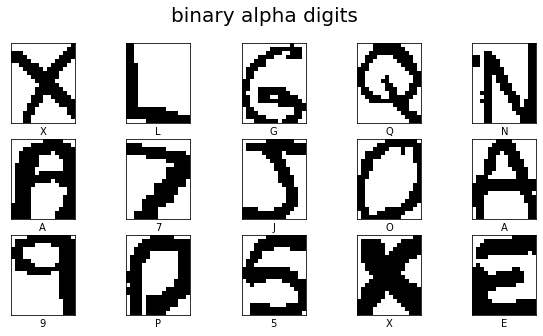

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [6]:
X[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0,

**Данные имеют бинарный вид и не требуют нормализации.**

In [7]:
X = X.reshape(X.shape[0], -1)

In [8]:
# Разбиение данных на обучающую и тестовую выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((982, 320), (422, 320), (982,), (422,))

In [9]:

model = keras.Sequential([
    keras.layers.Input(320),
    keras.layers.Dense(320, activation='sigmoid',
                       kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),                  
    keras.layers.Dense(len(classes))
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 2.9990 - accuracy: 0.2831
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 1.2709 - accuracy: 0.6711
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.7986 - accuracy: 0.8014
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.8707
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.8941
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.9206
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.9440
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.9623
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 0.2659 - accuracy: 0.9725
Epoch 10/10
31/31 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9664


In [12]:
# Оценка метрики "accuracy" на обучающей выборке.
model.evaluate(X_train, y_train)

31/31 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9715


[0.20694786310195923, 0.9714867472648621]

In [13]:
# Оценка метрики "accuracy" на обучающей выборке.
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1.1784 - accuracy: 0.7062


[1.1783982515335083, 0.7061611413955688]

In [14]:
#!pip install catboost
from catboost import CatBoostClassifier

In [15]:
cbc = CatBoostClassifier(random_seed=42)

In [16]:
%%time
cbc.fit(X_train, y_train, verbose=0)

CPU times: user 17min 33s, sys: 1.42 s, total: 17min 35s
Wall time: 9min 4s


In [17]:
# Оценка метрики "accuracy" на обучающей выборке.
accuracy_score(y_train, cbc.predict(X_train))

0.9755600814663951

In [18]:
# Оценка метрики "accuracy" на тестовой выборке.
accuracy_score(y_test, cbc.predict(X_test))

0.6943127962085308

**Оба метода: и нейросеть и catboost, показали примерно одинаковые результаты на тесте, но скорость обучения нейросети на порядок выше, чем алгоритм catboost.**